In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from kmodes.kprototypes import KPrototypes
from kmodes.kmodes import KModes


import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
%config InlineBackend.figure_format='retina'
from sklearn.preprocessing import LabelEncoder


import seaborn as sns

sns.set(style="darkgrid")


In [5]:
# Load the data
data_text=pd.read_csv("temp.csv",encoding = "ISO-8859-1", index_col=0)

In [6]:
#removing all the rows having row values as null
data_text=data_text[data_text['rest_name'].notnull()]

In [7]:
data_text.columns

Index(['index', 'rest_name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'restaurant_category', 'dish_liked', 'cuisines',
       'meal_cost', 'reviews_list', 'menu_item', 'restaurant_type',
       'Neighbourhood', 'num_dishes_liked', 'cuisines_replaced',
       'north indian', 'chinese', 'south indian', 'continental', 'cafe',
       'fast food', 'beverages', 'italian', 'american', 'desserts',
       'rest_cusines', 'votes_new', 'ReviewSentiment', 'RateScaleded'],
      dtype='object')

In [8]:
## get all the data
##chart some data
##scale the data
##

In [9]:
## drop all the columns not needed for clustering process
drop_list=['rest_name','votes_new','menu_item','restaurant_category','dish_liked','cuisines','cuisines_replaced','reviews_list']

In [10]:
data_text.drop(columns = drop_list,inplace =True)

In [11]:
#convert categorical variables in binary using label encoder
data_text['online_order_bin']=LabelEncoder().fit_transform(data_text['online_order'])
data_text['book_table_bin']=LabelEncoder().fit_transform(data_text['book_table'])

In [12]:
# data summary
data_text.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
index,12256.0,16915.009465,15166.047598,0.000000,5227.750000,10923.500000,24378.250000,51677.000000
rate,9078.0,3.612437,0.426464,1.800000,3.300000,3.600000,3.900000,4.900000
votes,12256.0,168.644501,559.325703,0.000000,0.000000,23.000000,113.000000,16345.000000
meal_cost,12197.0,450.722965,280.708044,40.000000,250.000000,400.000000,550.000000,1650.000000
num_dishes_liked,12256.0,2.460591,2.367207,1.000000,1.000000,1.000000,4.000000,7.000000
north indian,12256.0,0.413757,0.492526,0.000000,0.000000,0.000000,1.000000,1.000000
chinese,12256.0,0.288430,0.453051,0.000000,0.000000,0.000000,1.000000,1.000000
south indian,12256.0,0.341221,0.474139,0.000000,0.000000,0.000000,1.000000,1.000000
continental,12256.0,0.081674,0.273879,0.000000,0.000000,0.000000,0.000000,1.000000
cafe,12256.0,0.117493,0.322021,0.000000,0.000000,0.000000,0.000000,1.000000


In [13]:
data_text.columns

Index(['index', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'meal_cost', 'restaurant_type', 'Neighbourhood', 'num_dishes_liked',
       'north indian', 'chinese', 'south indian', 'continental', 'cafe',
       'fast food', 'beverages', 'italian', 'american', 'desserts',
       'rest_cusines', 'ReviewSentiment', 'RateScaleded', 'online_order_bin',
       'book_table_bin'],
      dtype='object')

In [14]:
## As KMeans algorithms is sensitive to outliers; verify outliers

#Fill all NaN values as Kmeans doesnt work with NaN values

In [15]:
data_text['meal_cost'].fillna(data_text['meal_cost'].mean(), inplace = True)

data_text['rate'].fillna(data_text['rate'].mean(), inplace = True)

In [16]:
features=['rate','votes','meal_cost','ReviewSentiment','RateScaleded','num_dishes_liked']
#features=['meal_cost','ReviewSentiment']

In [17]:
# scale the data
X = StandardScaler().fit_transform(data_text[features])

In [18]:
Sum_of_squared_distances = []

K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, init='k-means++',max_iter=400, tol=0.0001)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    

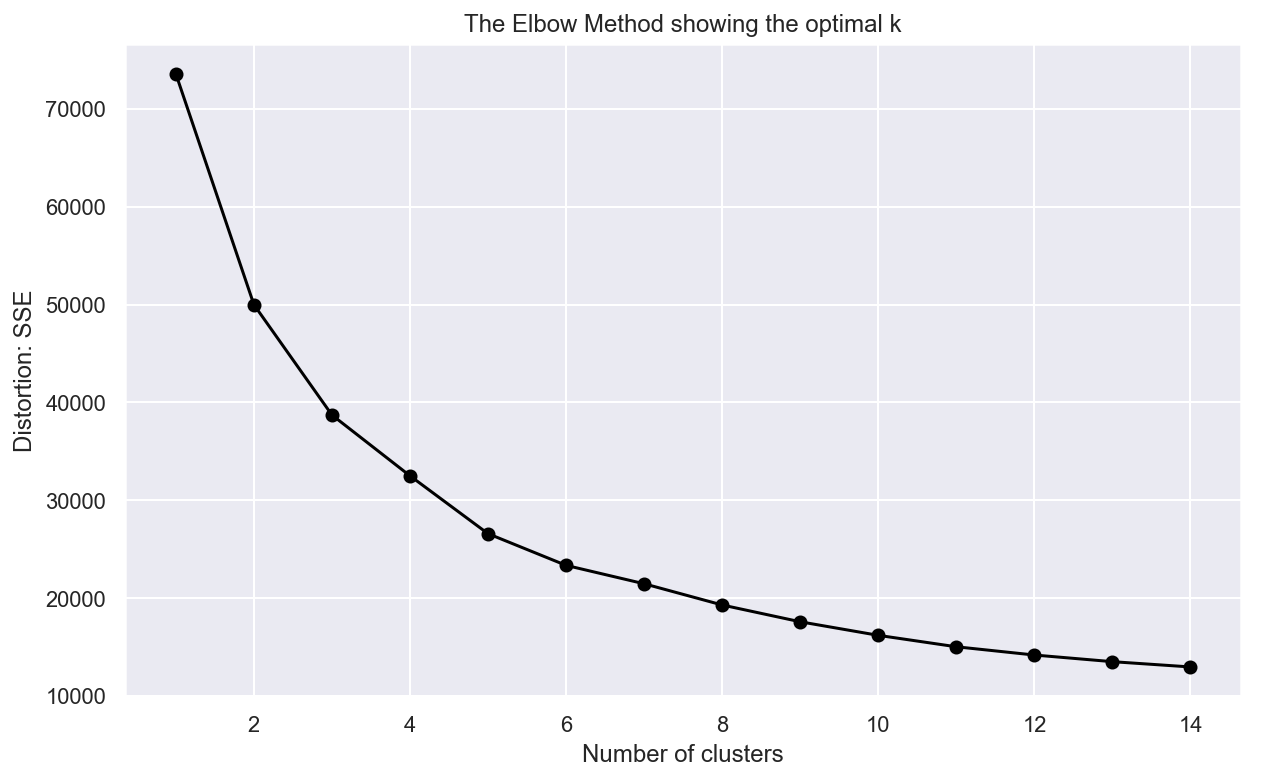

In [19]:
# Plot the elbow
plt.figure(figsize=(10,6))
plt.plot(K, Sum_of_squared_distances, 'o-',color='black')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion: SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

"import numpy as np
#from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

sillhoute_scores = []
n_cluster_list = np.arange(2,15).astype(int)


for n_cluster in n_cluster_list:
    
    kmeans = KMeans(n_clusters=n_cluster)
    cluster_found = kmeans.fit_predict(X)
    sillhoute_scores.append(silhouette_score(X, kmeans.labels_))"

from sklearn.manifold import TSNE
import matplotlib.colors

tsne = TSNE()
results_tsne = tsne.fit_transform(X)

cmap = matplotlib.colors.LinearSegmentedColormap.from_list(cluster_values, color_list)

plt.scatter(results_tsne[:,0], results_tsne[:,1],
    c=.index.get_level_values('cluster'),
    cmap=cmap, 
    alpha=0.6, 
    )

# clustering with normal data

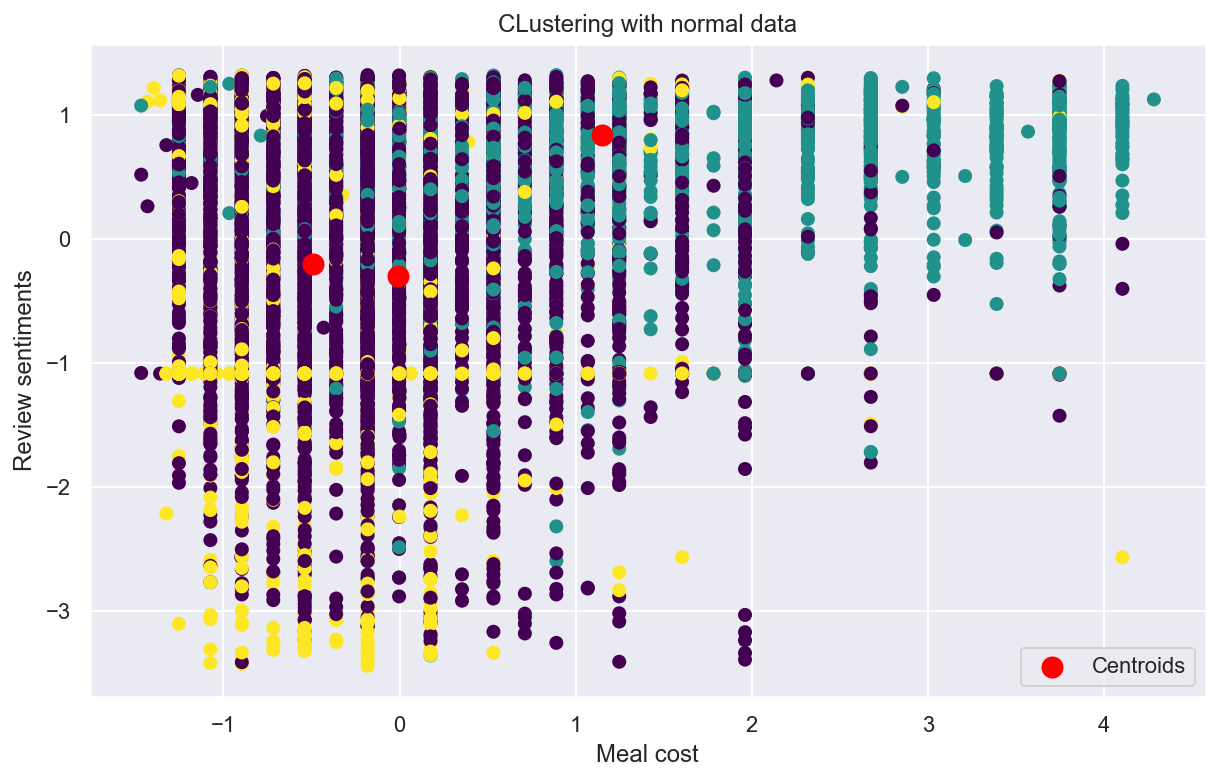

In [20]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42,max_iter=400,tol=0.0001)
y_kmeans = kmeans.fit_predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X[:, 2], X[:, 3], c=y_kmeans, cmap='viridis');
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroids');
plt.title('CLustering with normal data')
plt.xlabel('Meal cost')
plt.ylabel('Review sentiments')
plt.legend()
plt.show()

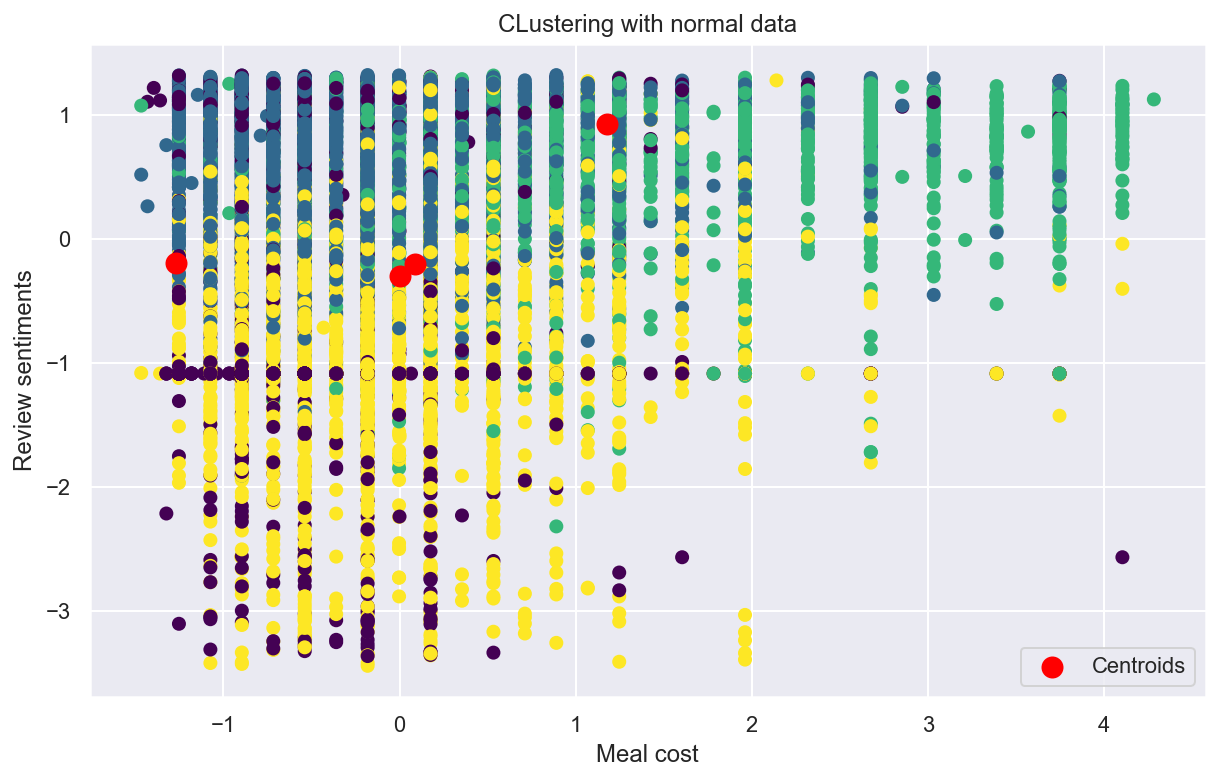

In [21]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42,max_iter=400,tol=0.0001)
y_kmeans = kmeans.fit_predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X[:, 2], X[:, 3], c=y_kmeans, cmap='viridis');
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroids');
plt.title('CLustering with normal data')
plt.xlabel('Meal cost')
plt.ylabel('Review sentiments')
plt.legend()
plt.show()

#As clusters are overlapping eachother. Lets try clusters with dimension reduction data

# Clustering with PCA

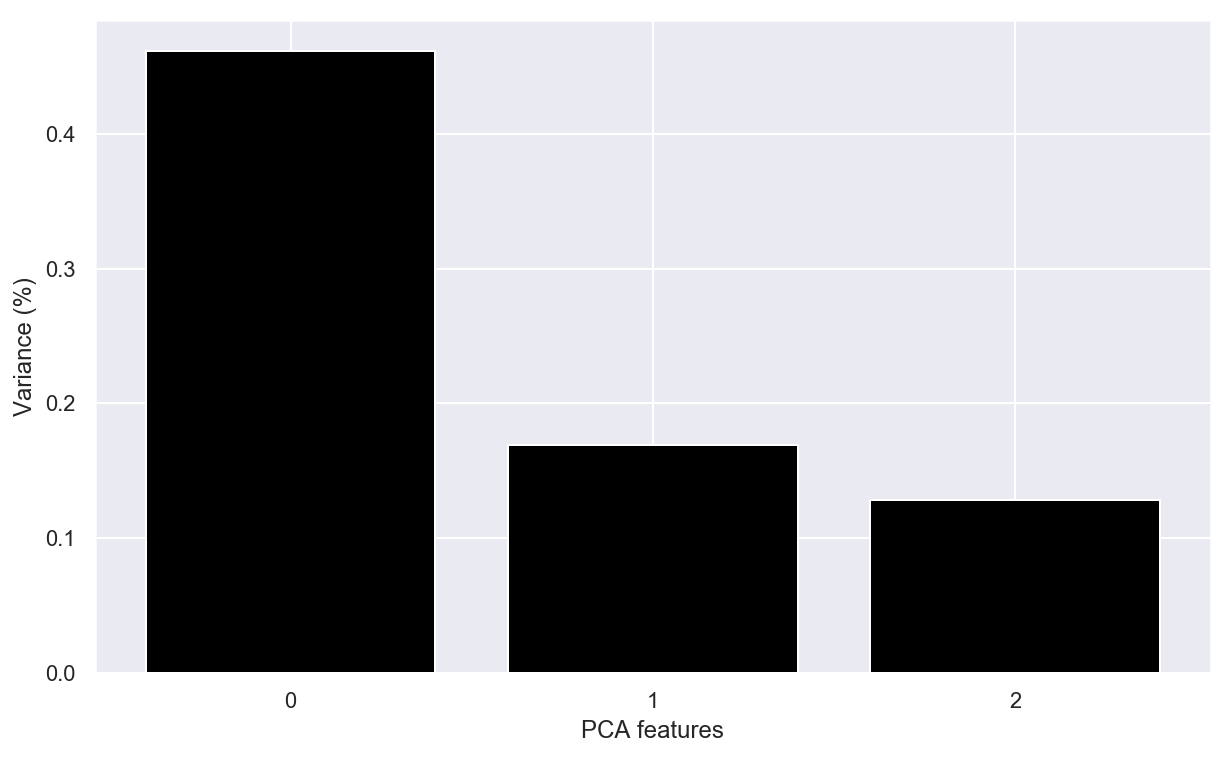

In [22]:
# Imports
# Create a PCA instance: pca
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
# Plot the explained variances
features = range(pca.n_components_)
plt.figure(figsize=(10,6))
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('Variance (%)')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

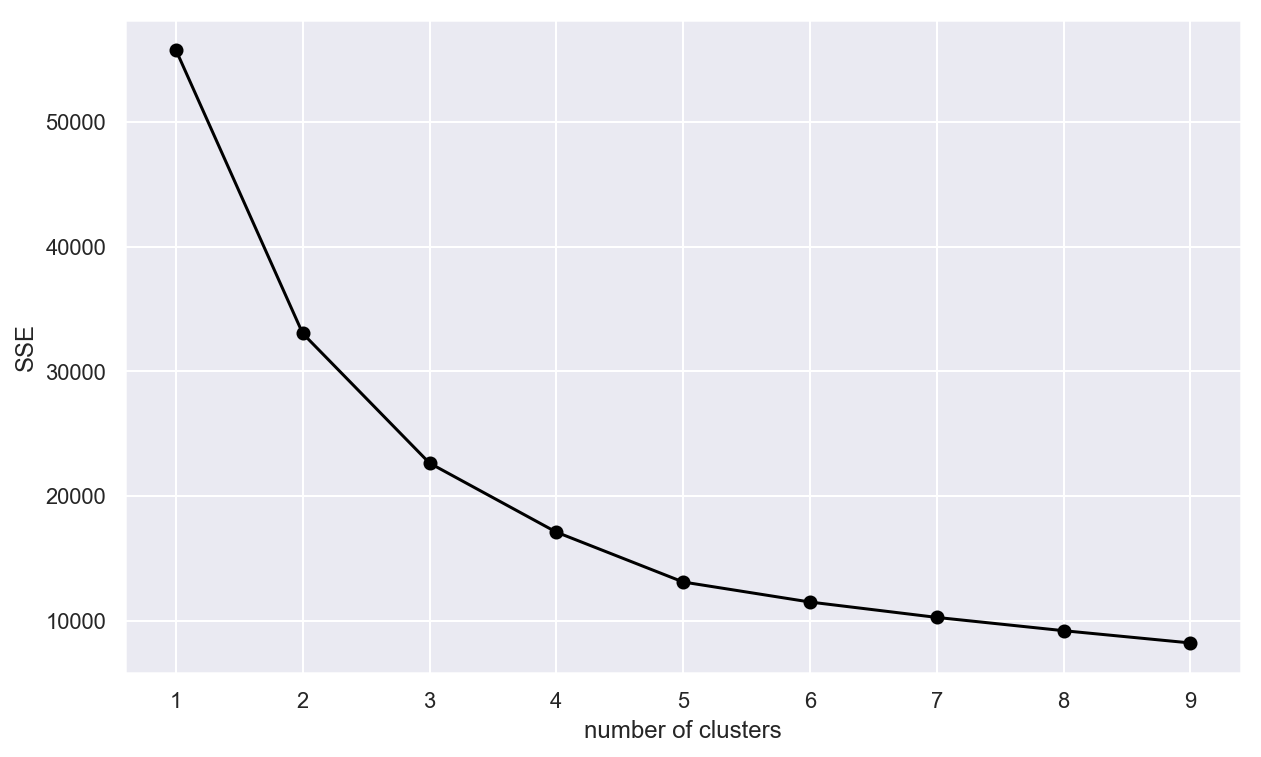

In [23]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k, init='k-means++',max_iter=400, tol=0.0001)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
plt.figure(figsize=(10,6))    
plt.plot(ks, inertias, '-o', color='black')

plt.xlabel('number of clusters')
plt.ylabel('SSE')
plt.xticks(ks)

plt.show()

No handles with labels found to put in legend.


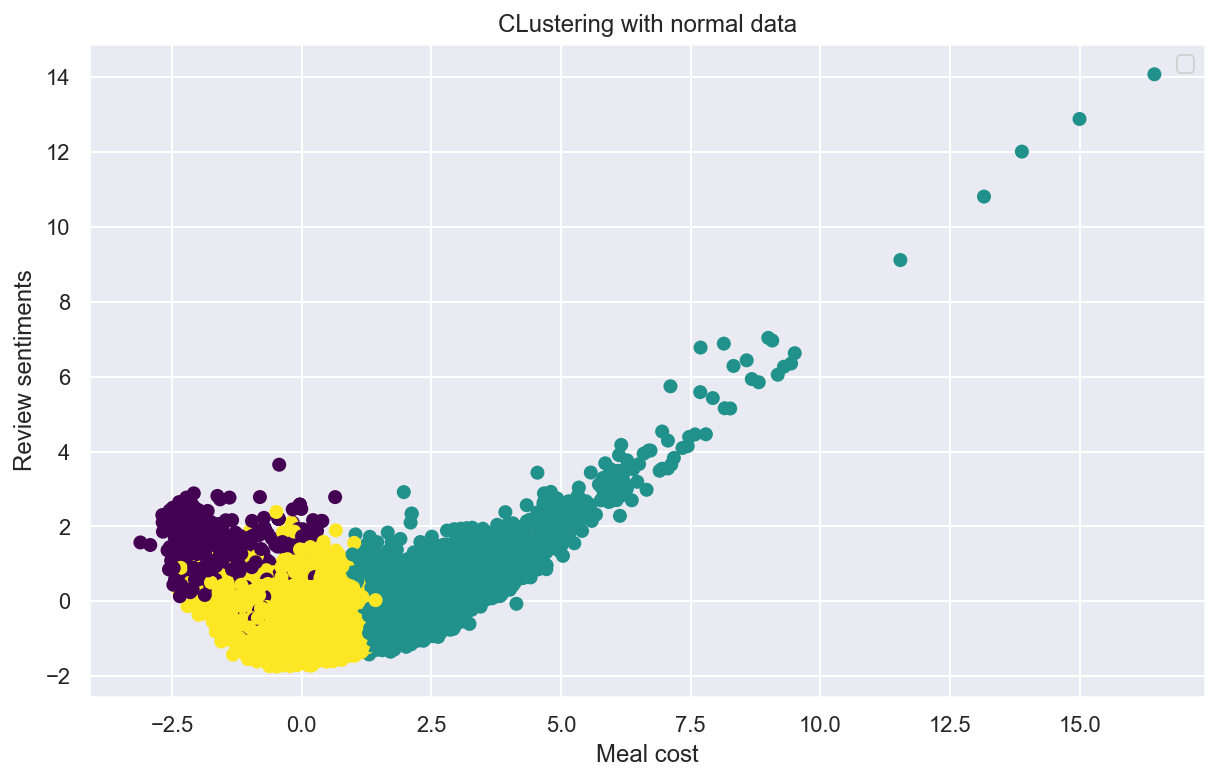

In [194]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 10,max_iter=500,tol=0.001)
y_kmeans = kmeans.fit_predict(principalComponents)
plt.figure(figsize=(10,6))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=y_kmeans, cmap='viridis');
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroids');
plt.title('CLustering with normal data')
plt.xlabel('Meal cost')
plt.ylabel('Review sentiments')
plt.legend()
plt.show()

No handles with labels found to put in legend.


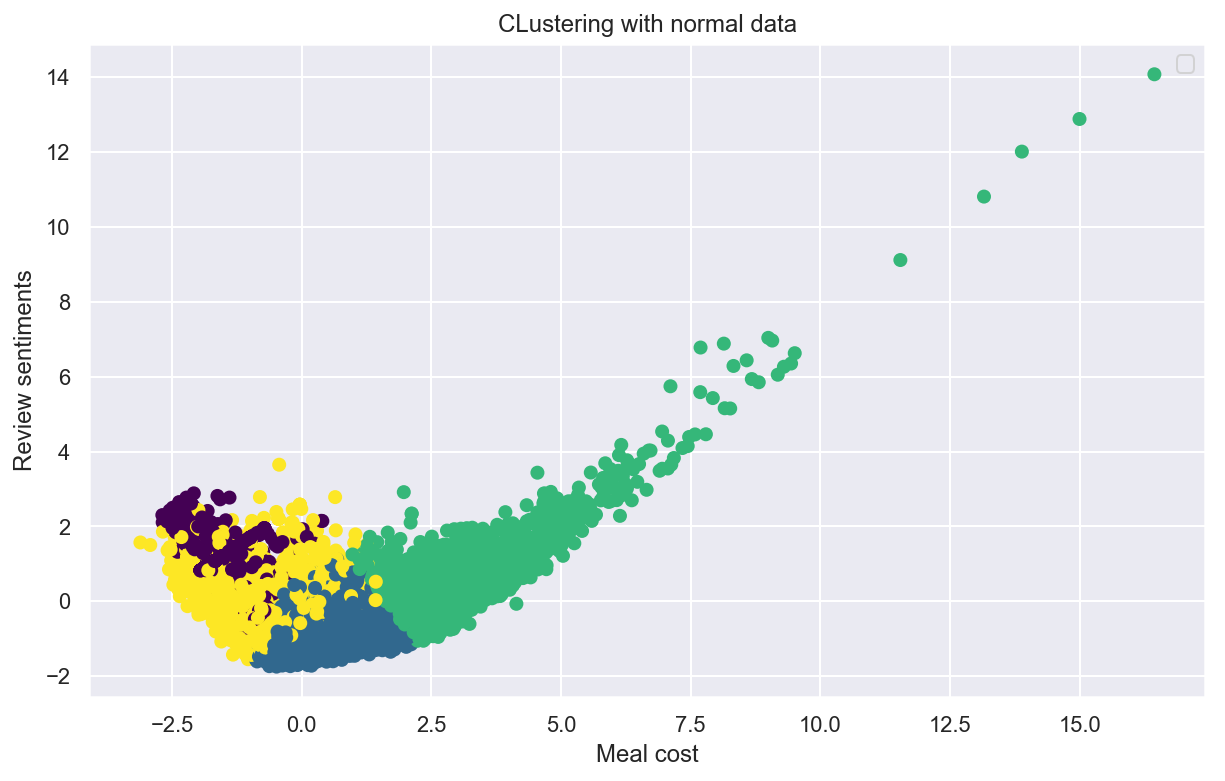

In [195]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42,max_iter=400,tol=0.001)
y_kmeans = kmeans.fit_predict(principalComponents)
plt.figure(figsize=(10,6))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=y_kmeans, cmap='viridis');
#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroids');
plt.title('CLustering with normal data')
plt.xlabel('Meal cost')
plt.ylabel('Review sentiments')
plt.legend()
plt.show()

In [26]:
#assign clusters
data_cluster_kmeans=pd.concat([data_text,pd.DataFrame(y_kmeans)],axis=1)

# Clusters are still overlapping a bit. lets try other algorithms
# GMM

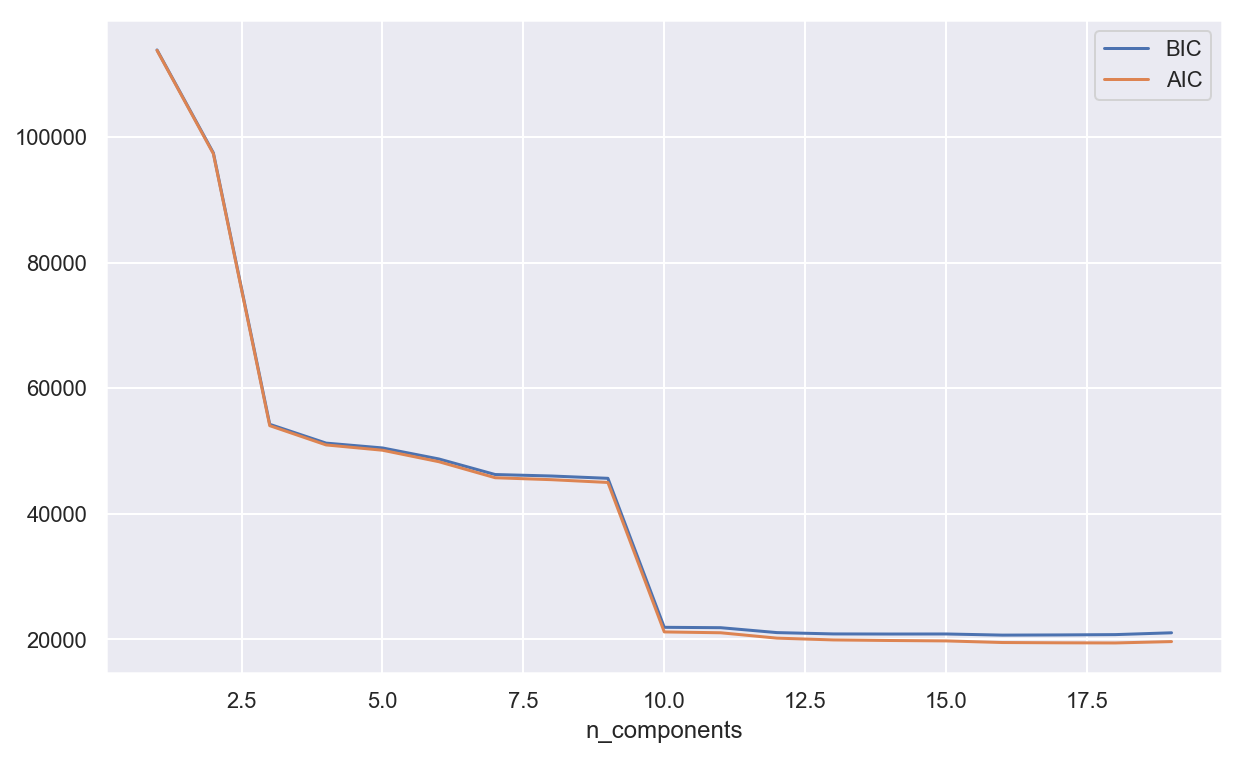

In [27]:
n_components = np.arange(1, 20)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(principalComponents) for n in n_components]

plt.figure(figsize=(10,6))
plt.plot(n_components, [m.bic(principalComponents) for m in models], label='BIC')
plt.plot(n_components, [m.aic(principalComponents) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [200]:
gmm = GaussianMixture(n_components=3)
gmm.fit(principalComponents)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

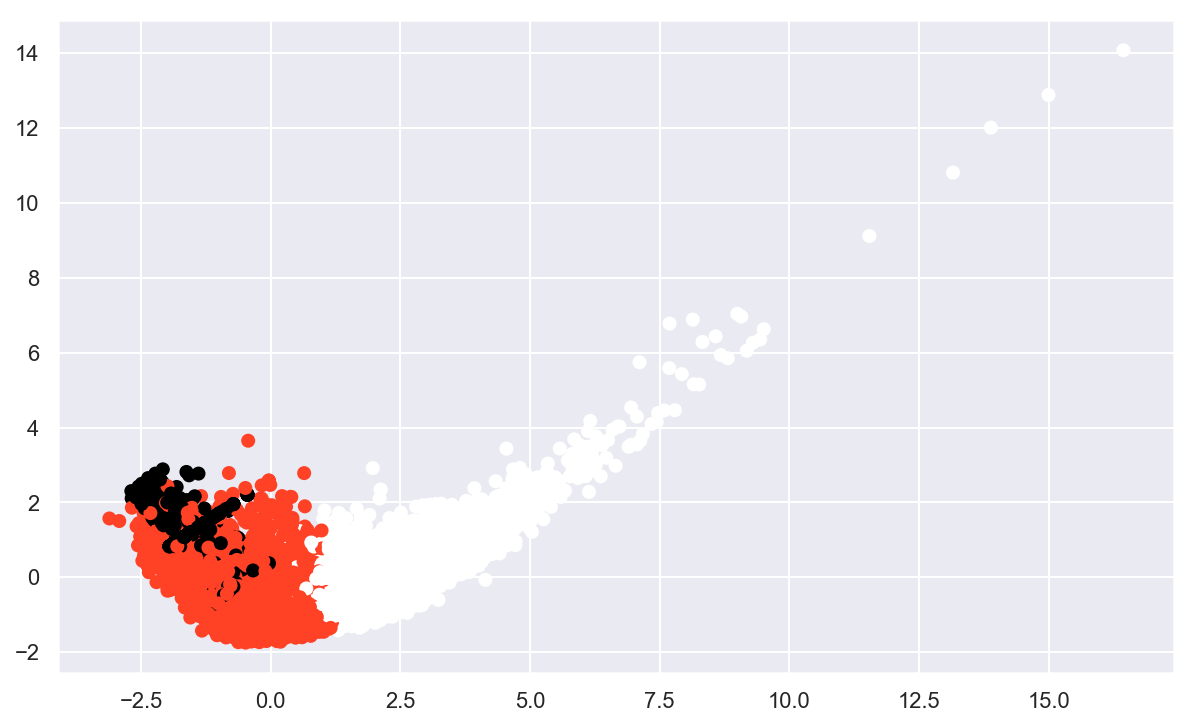

In [201]:
labels = gmm.predict(principalComponents)
plt.figure(figsize=(10,6))
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c=labels, cmap='CMRmap');

In [202]:
data_cluster_gmm=pd.concat([data_text,pd.DataFrame(labels)],axis=1)

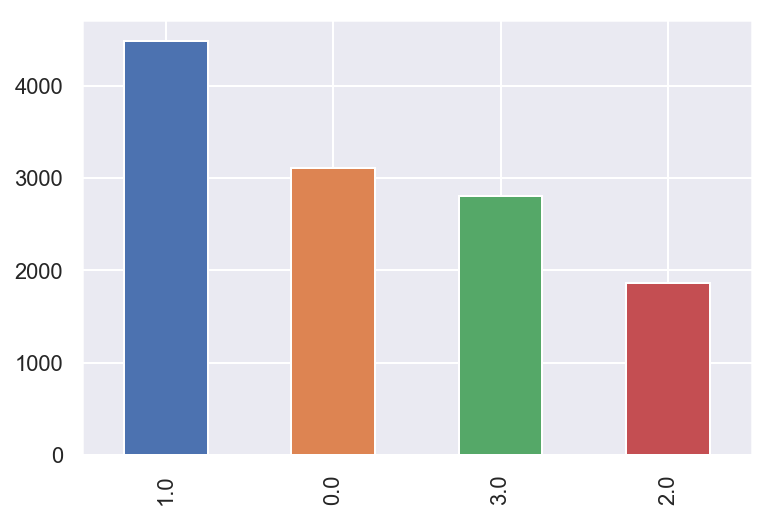

In [31]:
data_cluster_kmeans[0].value_counts().plot.bar()
plt.show()

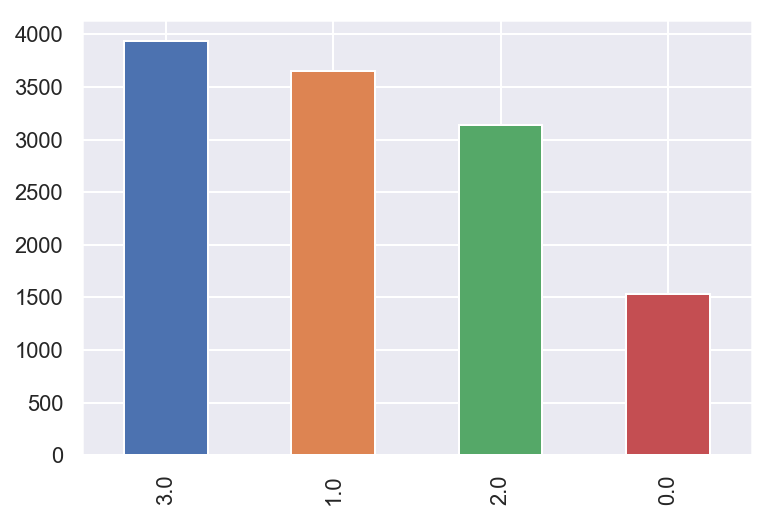

In [32]:
data_cluster_gmm[0].value_counts().plot.bar()
plt.show()

# As categorical variables are not included in Kmeans and GMM, lets try with mixed variables

# Analysis of cluster data

In [204]:

data_cluster_gmm.rename(columns={0:'clusters'},inplace =True)

In [205]:
data_cluster_gmm['clusters'].value_counts().index

Float64Index([1.0, 0.0, 2.0], dtype='float64')

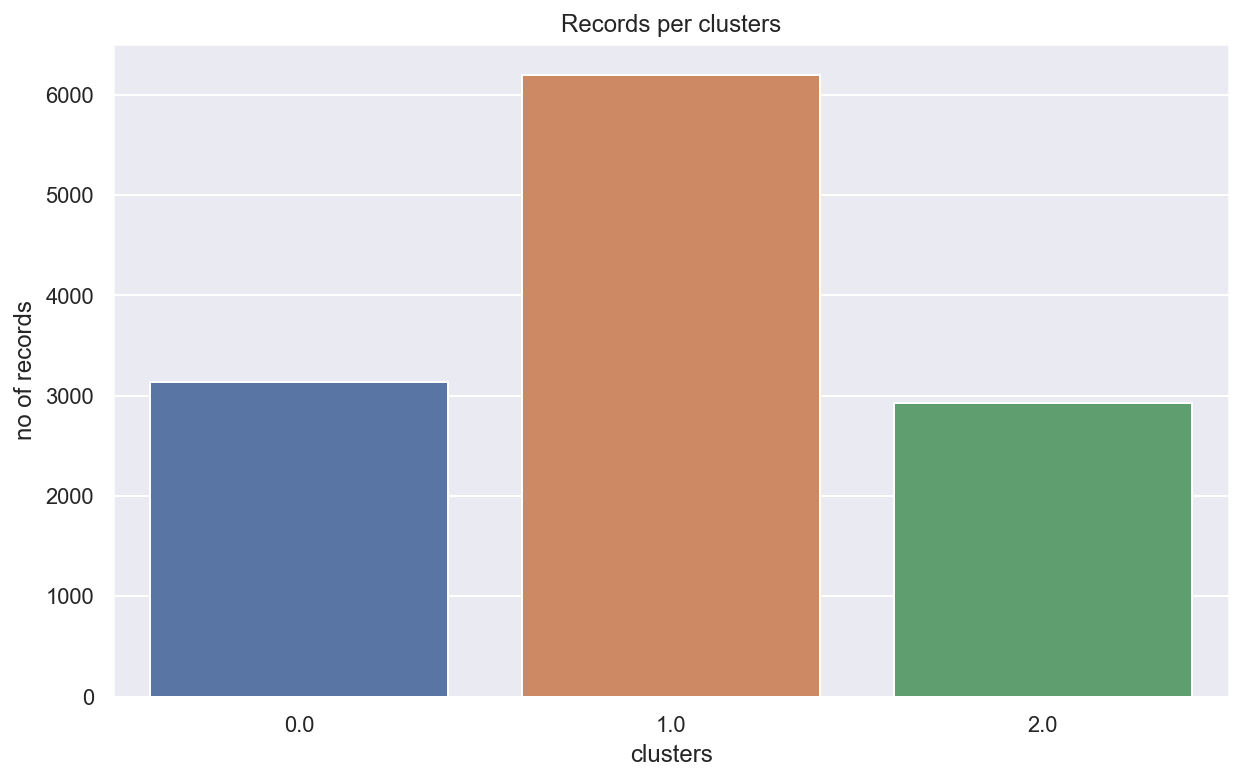

In [206]:
#Total records by each cluster
plt.figure(figsize=(10,6))
sns.barplot(x=data_cluster_gmm['clusters'].value_counts().index,y=data_cluster_gmm['clusters'].value_counts().values);
plt.xlabel('clusters')
plt.ylabel('no of records')
plt.title('Records per clusters')
plt.show()

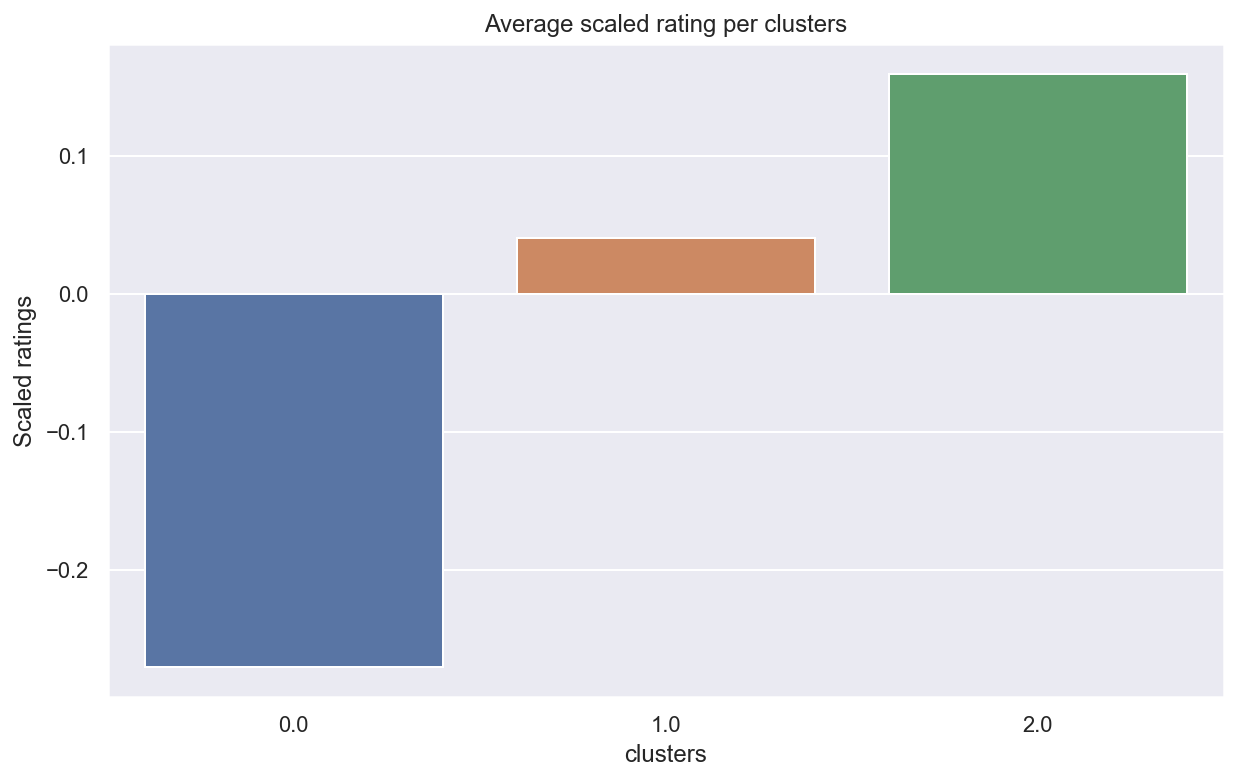

In [207]:
data_cluster_gmm.groupby('clusters')['RateScaleded'].agg(['mean'])
#Total records by each cluster
plt.figure(figsize=(10,6))
sns.barplot(x=data_cluster_gmm.groupby('clusters')['RateScaleded'].agg(['mean']).reset_index()['clusters'],y=data_cluster_gmm.groupby('clusters')['RateScaleded'].agg(['mean']).reset_index()['mean']);
plt.xlabel('clusters')
plt.ylabel('Scaled ratings')
plt.title('Average scaled rating per clusters')
plt.show()

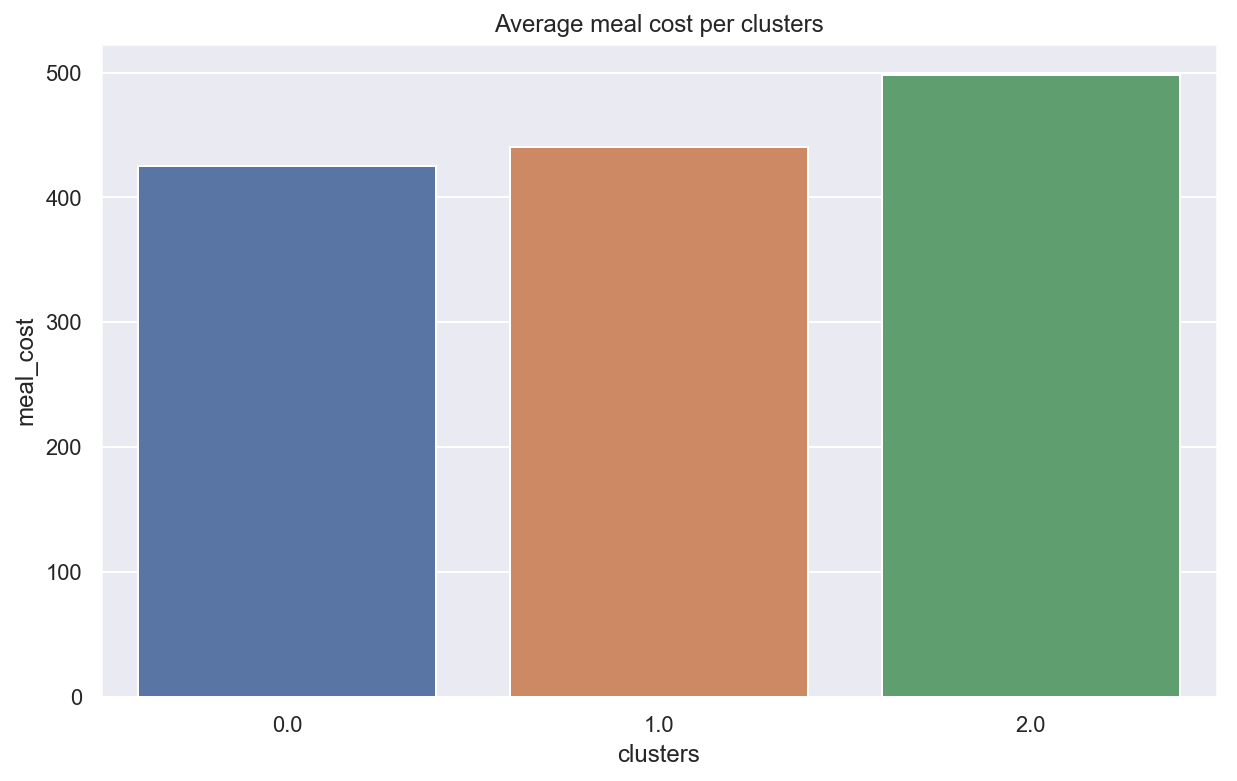

In [208]:
data_cluster_gmm.groupby('clusters')['RateScaleded'].agg(['mean'])
#Total records by each cluster
plt.figure(figsize=(10,6))
sns.barplot(x=data_cluster_gmm.groupby('clusters')['meal_cost'].agg(['mean']).reset_index()['clusters'],y=data_cluster_gmm.groupby('clusters')['meal_cost'].agg(['mean']).reset_index()['mean']);
plt.xlabel('clusters')
plt.ylabel('meal_cost')
plt.title('Average meal cost per clusters')
plt.show()

C:\Users\A550894\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


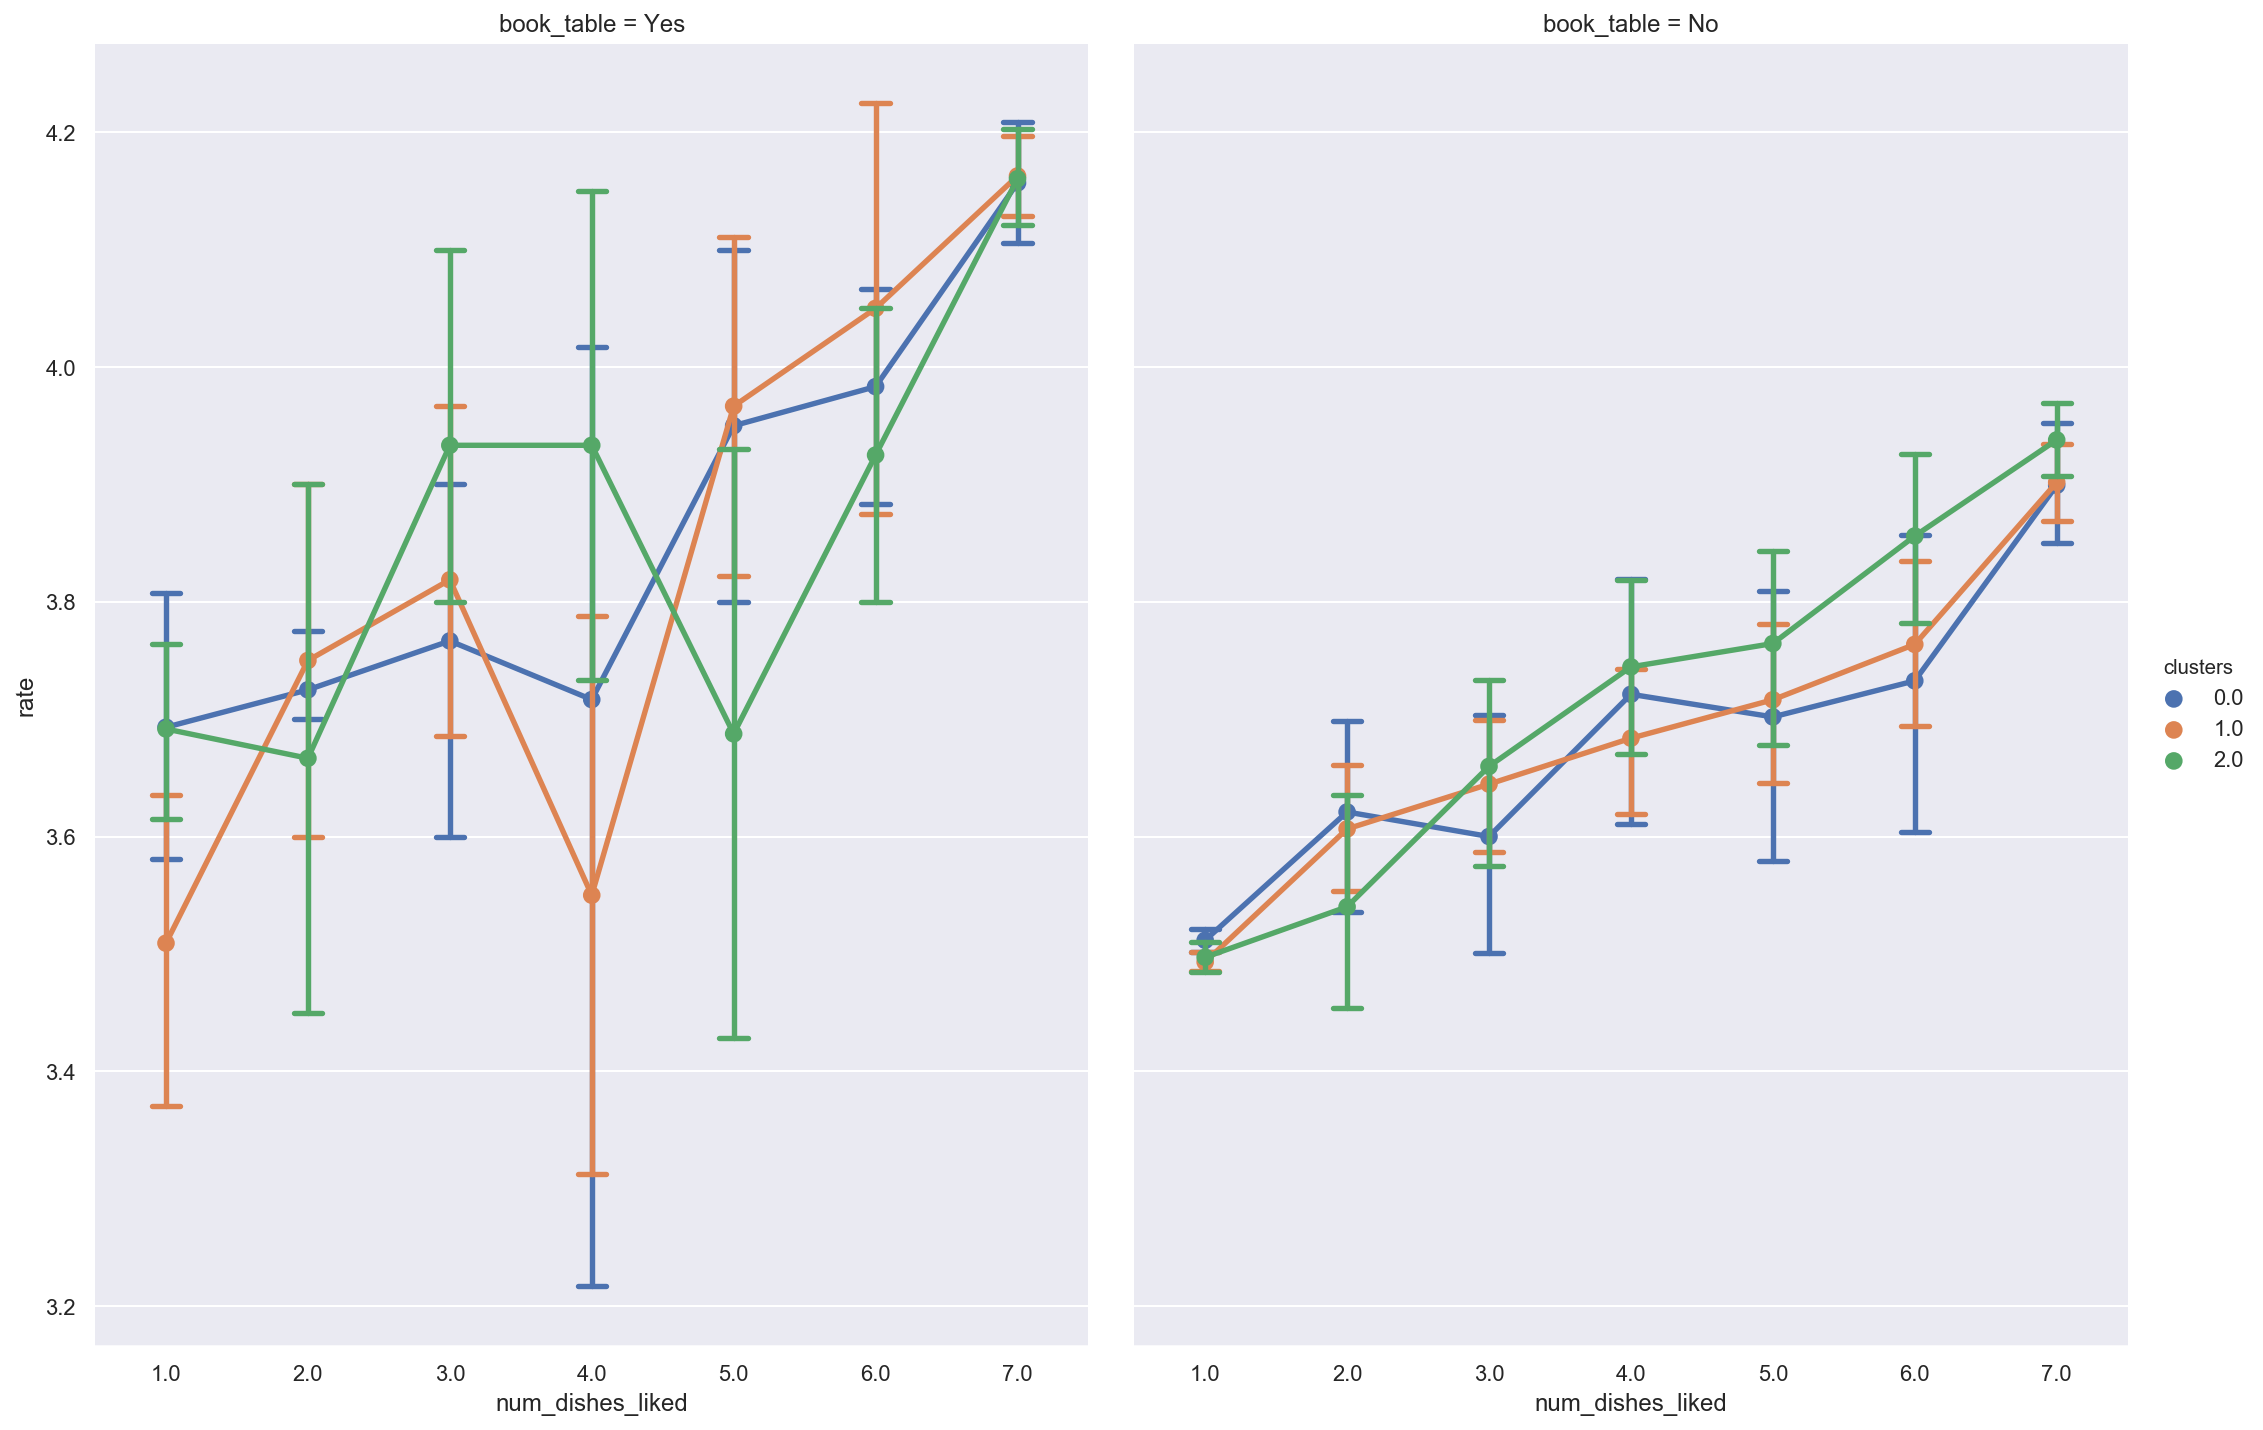

In [209]:
g = sns.catplot(x="num_dishes_liked", y="rate", hue="clusters", col="book_table",
                capsize=.2, palette=["C0", "C1","C2", "k"], height=10, aspect=.75,
                kind="point", data=data_cluster_gmm)
g.despine(left=True)
plt.show()

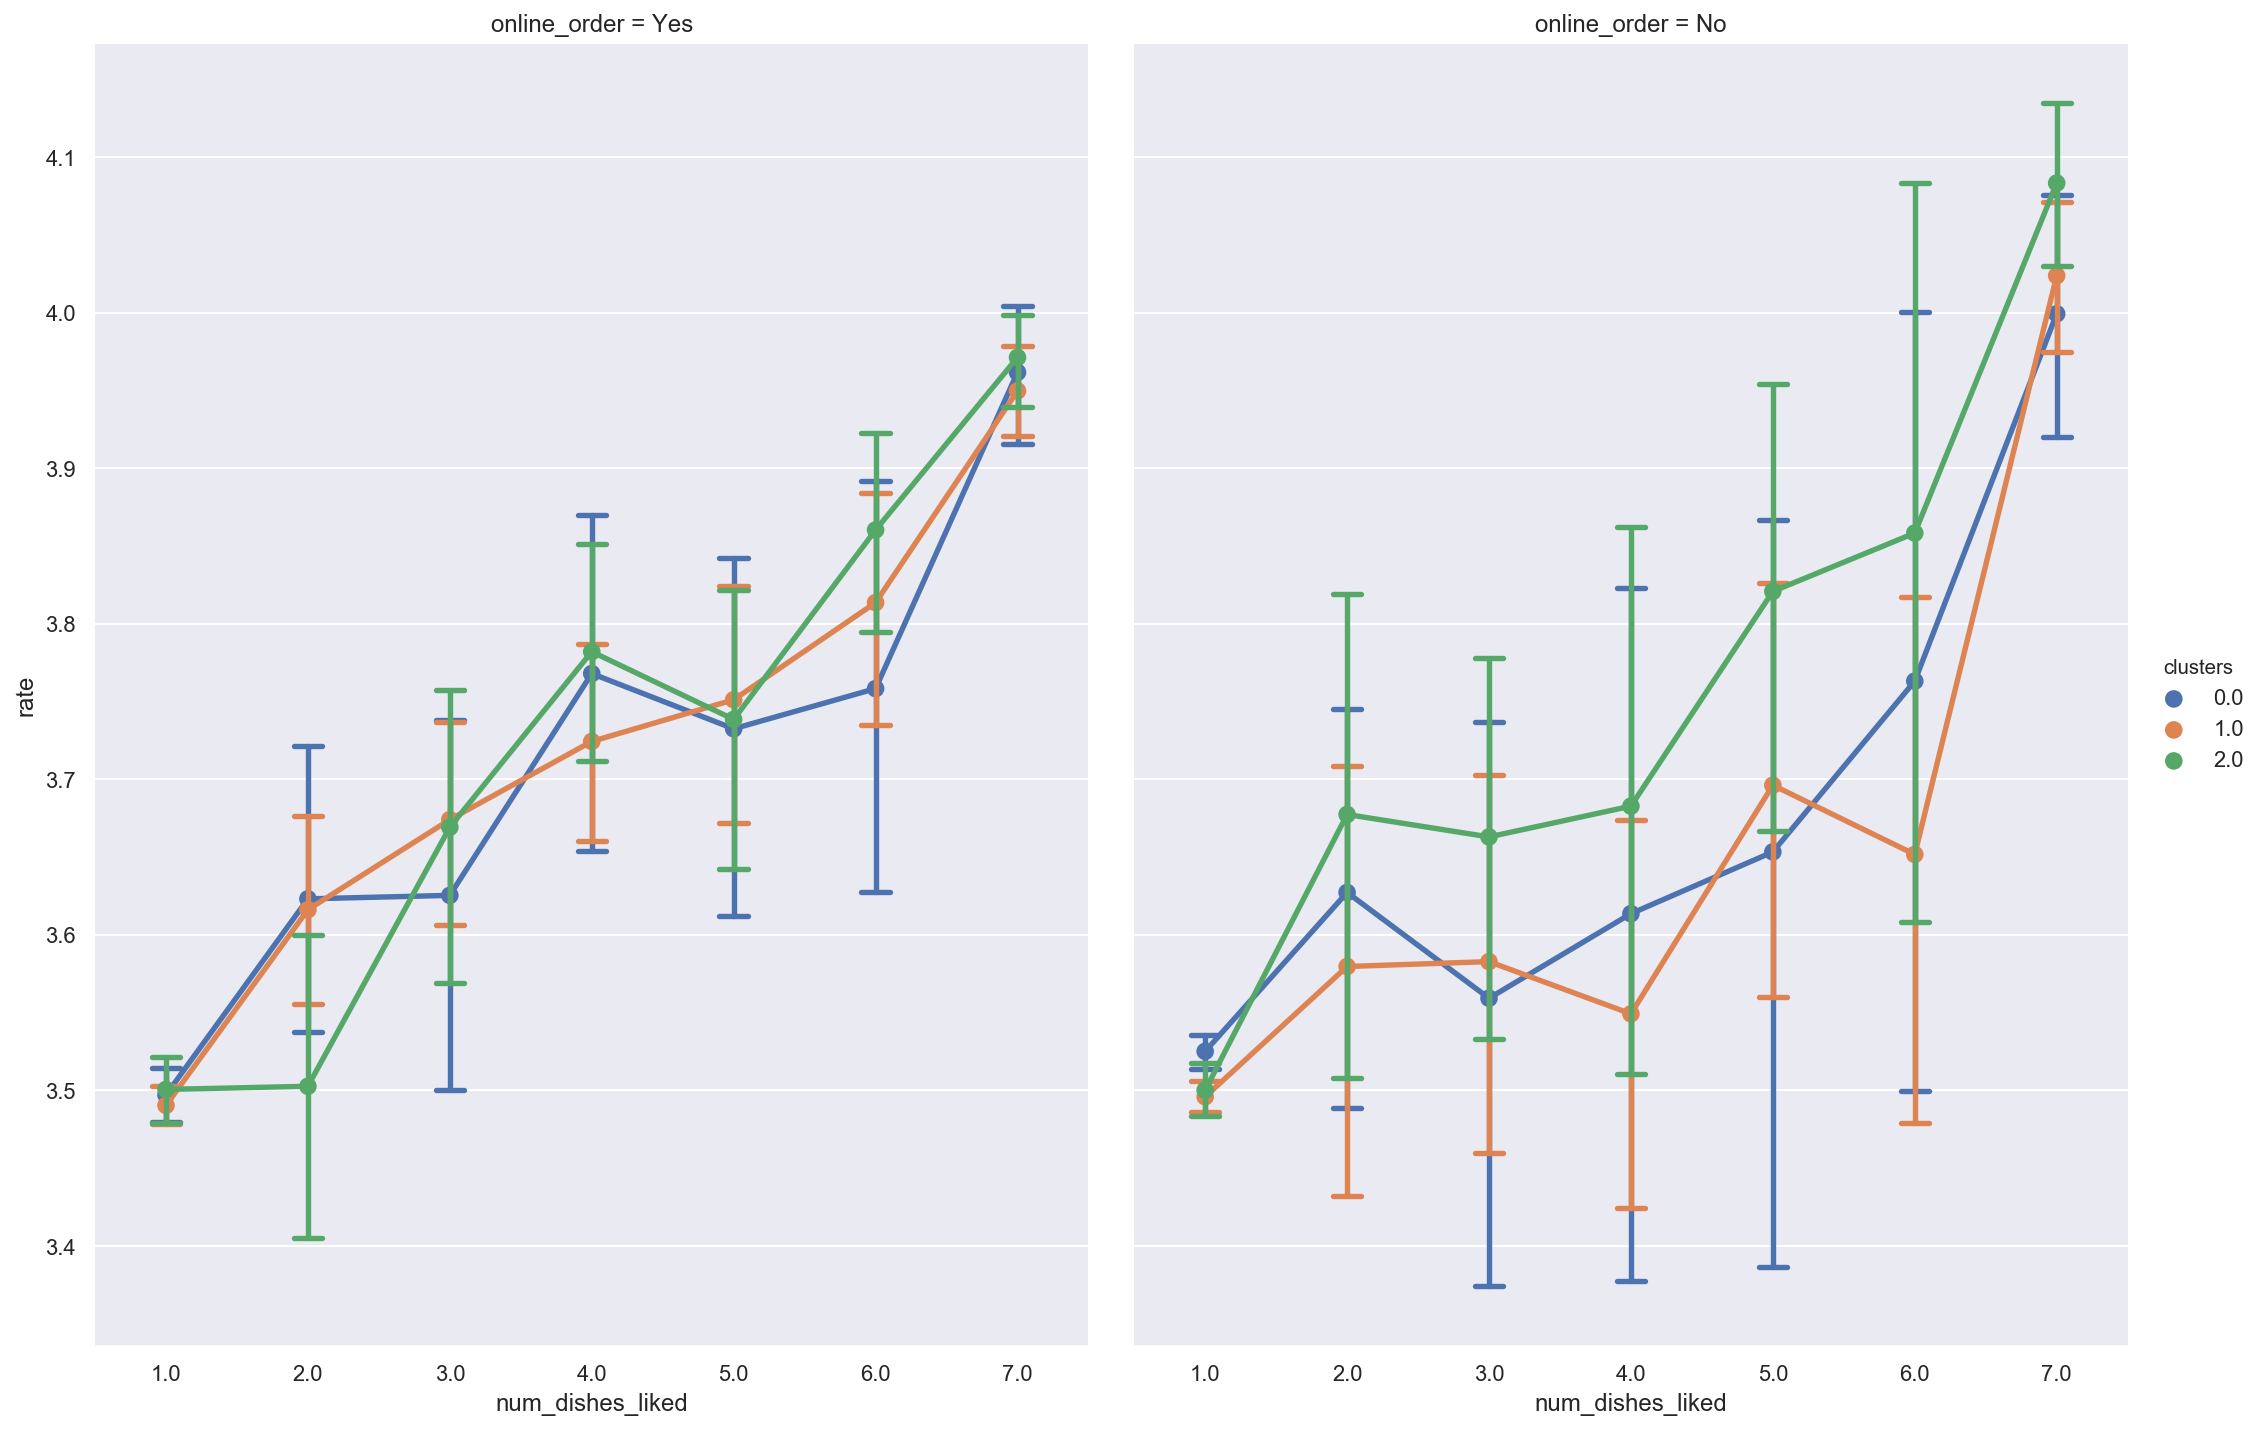

In [210]:
g = sns.catplot(x="num_dishes_liked", y="rate", hue="clusters", col="online_order",
                capsize=.2, palette=["C0", "C1","C2", "k"], height=10, aspect=.75,
                kind="point", data=data_cluster_gmm)
g.despine(left=True)
plt.show()

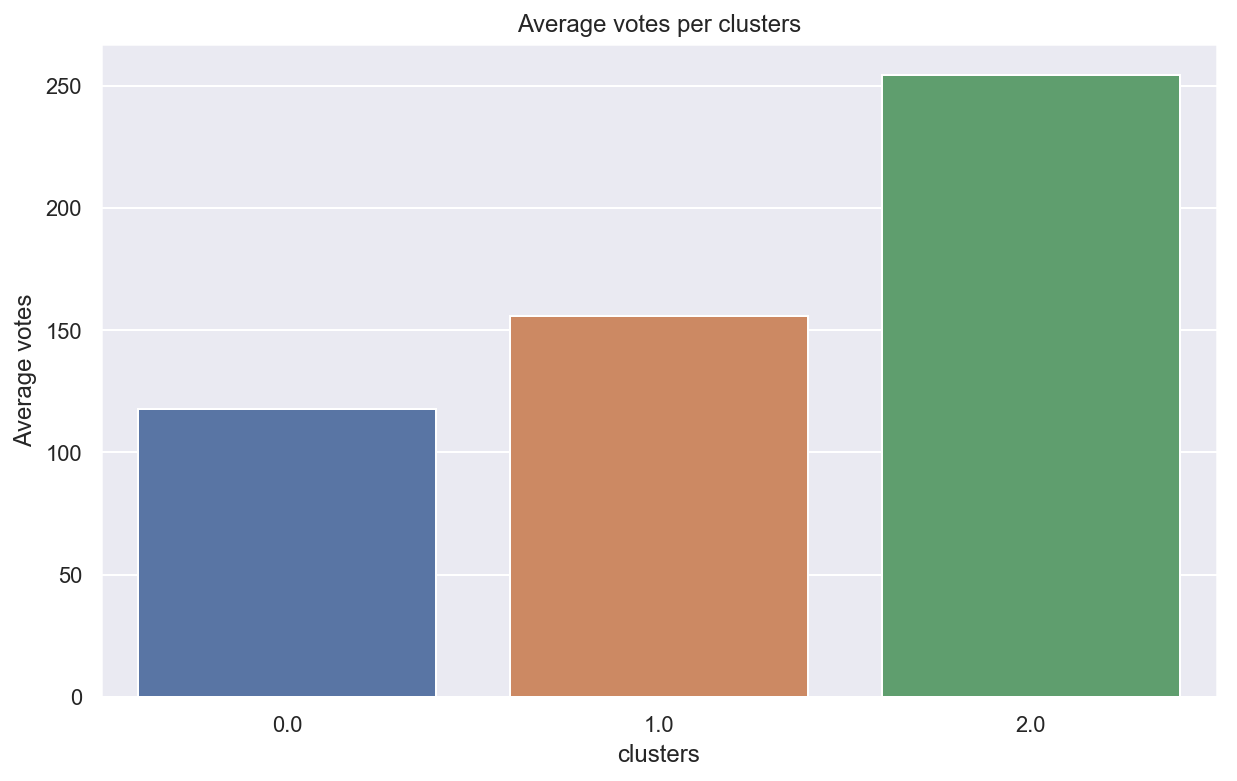

In [211]:
data_cluster_gmm.groupby('clusters')['votes'].agg(['mean'])
#Total records by each cluster
plt.figure(figsize=(10,6))
sns.barplot(x=data_cluster_gmm.groupby('clusters')['votes'].agg(['mean']).reset_index()['clusters'],y=data_cluster_gmm.groupby('clusters')['votes'].agg(['mean']).reset_index()['mean']);
plt.xlabel('clusters')
plt.ylabel('Average votes')
plt.title('Average votes per clusters')
plt.show()

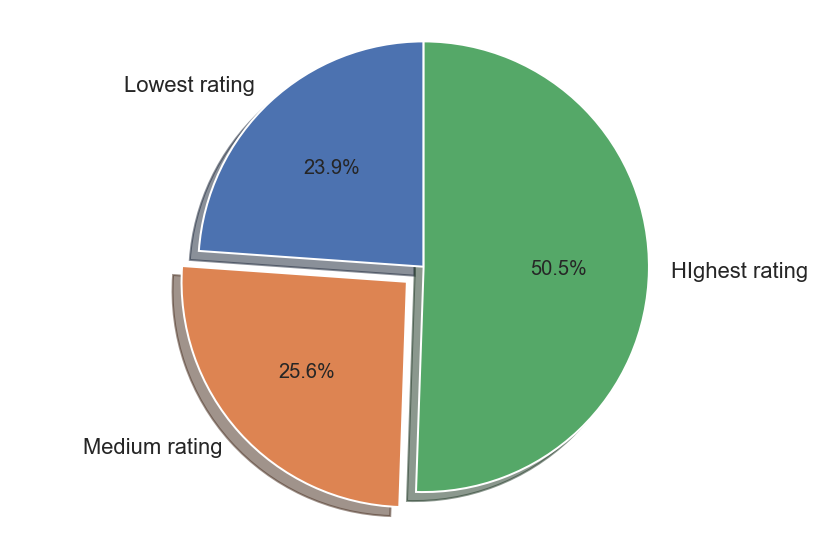

In [221]:
labels = ['Lowest rating', 'Medium rating', 'HIghest rating']
sizes = data_cluster_gmm['clusters'].value_counts().sort_values()
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0.1, 0.0)  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [217]:
data_cluster_gmm['clusters'].value_counts().sort_values()

2.0    2927
0.0    3135
1.0    6194
Name: clusters, dtype: int64